# Regression Script for Wine Quality Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

## Load the data

In [2]:
data = pd.read_csv("winequality_red.csv",header=0)
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


## Descriptive statistics of the dataset

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Remove the output from the dataset

In [4]:
Output = data['quality']
data.drop("quality",axis=1,inplace=True)

## Correlation Plot of predictors

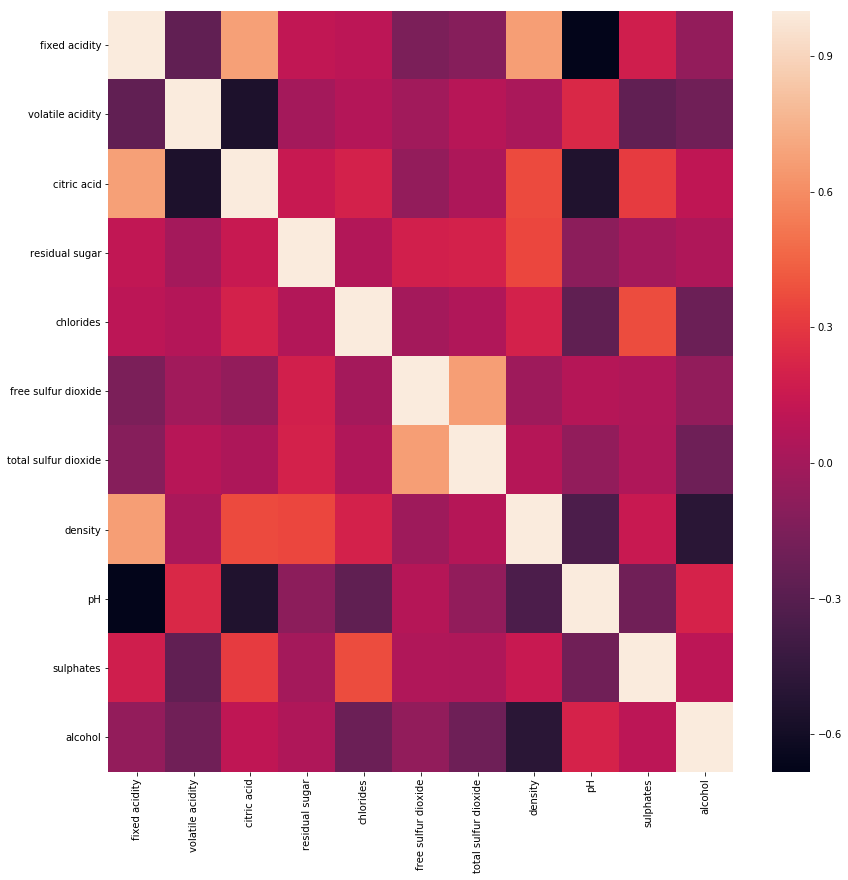

In [5]:

plt.figure(figsize=(14,14))
sns.heatmap(data.corr());

## Split the data into training and testing set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,Output,test_size=0.25, random_state=2)


In [7]:
print(X_train.shape)
print(X_test.shape)

(1199, 11)
(400, 11)


## Scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

y_train_sc = sc_y.fit_transform(Y_train.values.reshape(-1,1))



C:\Users\adi44\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\adi44\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Building the regressors

### 1. Multiple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Training and Testing RMSE

In [10]:
y_pred_multi_train = np.round_(multi_regressor.predict(X_train))
y_pred_multi_test = np.round_(multi_regressor.predict(X_test))

rmse_train = sqrt(mean_squared_error(Y_train, y_pred_multi_train))
rmse_test = sqrt(mean_squared_error(Y_test, y_pred_multi_test))

print("rmse for training is =",rmse_train)
print("rmse for testing is =",rmse_test)

rmse for training is = 0.705039644807741
rmse for testing is = 0.6928203230275509


### 2. Support Vector Regression 

In [11]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_sc, y_train_sc)


C:\Users\adi44\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Training and Testing RMSE

In [12]:
y_pred_svr_train = regressor_svr.predict(X_train_sc)
y_pred_svr_test =  regressor_svr.predict(X_test_sc)

y_pred_svr_train=sc_y.inverse_transform(y_pred_svr_train)
y_pred_svr_test=sc_y.inverse_transform(y_pred_svr_test)

y_pred_svr_train=np.round_(y_pred_svr_train)
y_pred_svr_test=np.round_(y_pred_svr_test)

rmse_train_svr = sqrt(mean_squared_error(Y_train, y_pred_svr_train))
rmse_test_svr = sqrt(mean_squared_error(Y_test, y_pred_svr_test))

print("rmse for training is =",rmse_train_svr)
print("rmse for testing is =",rmse_test_svr)

rmse for training is = 0.610582243078661
rmse for testing is = 0.689202437604511


### 3. Decision Tree Regression 

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

### Training and Testing RMSE

In [14]:
y_pred_dt_train = np.round_(regressor_dt.predict(X_train))
y_pred_dt_test = np.round_(regressor_dt.predict(X_test))

rmse_train_dt = sqrt(mean_squared_error(Y_train, y_pred_dt_train))
rmse_test_dt = sqrt(mean_squared_error(Y_test, y_pred_dt_test))

print("rmse for training is =",rmse_train_dt)
print("rmse for testing is =",rmse_test_dt)

rmse for training is = 0.0
rmse for testing is = 0.8602325267042626


### Random Forest Regression 

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### Training and Testing RMSE

In [16]:
y_pred_rf_train = np.round_(regressor_rf.predict(X_train))
y_pred_rf_test = np.round_(regressor_rf.predict(X_test))

rmse_train_rf = sqrt(mean_squared_error(Y_train, y_pred_rf_train))
rmse_test_rf = sqrt(mean_squared_error(Y_test, y_pred_rf_test))

print("rmse for training is =",rmse_train_rf)
print("rmse for testing is =",rmse_test_rf)

rmse for training is = 0.27091418459143857
rmse for testing is = 0.6726812023536856
